In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from unidecode import unidecode


# datos

In [2]:
# !git clone git@github.com:juanguzman2/Precio-de-viviendas-en-colmbia.git

In [3]:
dfp=pd.read_csv(r'C:\Users\Juan Guzman\pviviendas\Data\dfmerged')
dfp.head(1)

,tipo,url,titulo,precio,area,habitaciones,banos,garajes,descripcion,Balcón,...,Parqueadero Visitantes,Colegios / Universidades,Parques cercanos,Zona Residencial,Closet,Nombre Municipio,Código Departamento,Código Municipio,Nombre Departamento,Tipo: Municipio / Isla / Área no municipalizada
0,Usada,https://www.fincaraiz.com.co/casa-campestre-en...,Casa Campestre en Venta Rionegro Vereda Guayabito,$ 1.380.000.000,"320,00 m²",5,6,2,Propiedad moderna con muy buenos acabados. Her...,1.0,...,NaN,NaN,NaN,NaN,NaN,RIONEGRO,5,5615.0,ANTIOQUIA,Municipio


# Limpieza de los Nan 

In [4]:
def graf_num_nan(df):
        dfNan = df.isnull().pipe( # ejecutar varias operaciones en el DataFrame, "pipe" que se encarga de pasar la salida de una función como entrada de la siguiente
                lambda df: (
                            df.sum() # Suma el número de valores faltantes en cada columna del DataFrame
                            .reset_index(name="numero_Nan") # Reinicia el índice del DataFrame resultante y se le asigna nombre
                            .rename(columns={'index':'variable'}) # se cambia el nombre de index a variable
                            .assign ( # agrega columnas al df
                                    observaciones = len(df), # numero total de registros en el df original
                                    pct_missing = lambda df1 : df1.numero_Nan / df1.observaciones * 100, # porcentaje Nan en cada variable
                                    )
                            )

                    )
        plt.figure(figsize=(20,7))
        dfgnan = dfNan.sort_values('numero_Nan') # almacenar el resumen del nan de las variables en el df dfgnan
        plot_range = range(1, len(dfgnan.index) + 1) # establece la posicion de cada variable en el grafico
        plt.hlines(y=plot_range, xmin=0, xmax=dfgnan.numero_Nan, colors='gray') # traza lineas horizontales en el grafico
        plt.plot(dfgnan.numero_Nan, plot_range, "o", color='black') # pone "o" en el eje x
        # plt.yticks(plot_range, dfgnan.variable) #  etiquetar los puntos en el eje y con los nombres de las variables
        plt.grid(axis="y") # agregar un gráfico de cuadrícula en el eje y
        plt.xlabel("numero de Nan")
        plt.ylabel("Variable en orden ascendente en razon al numero de Nan")


        return dfNan

,variable,numero_Nan,observaciones,pct_missing
0,tipo,0,3480,0.000000
1,url,0,3480,0.000000
2,titulo,0,3480,0.000000
3,precio,0,3480,0.000000
4,area,0,3480,0.000000
5,habitaciones,0,3480,0.000000
6,banos,0,3480,0.000000
7,garajes,0,3480,0.000000
8,descripcion,0,3480,0.000000
9,Balcón,1690,3480,48.563218


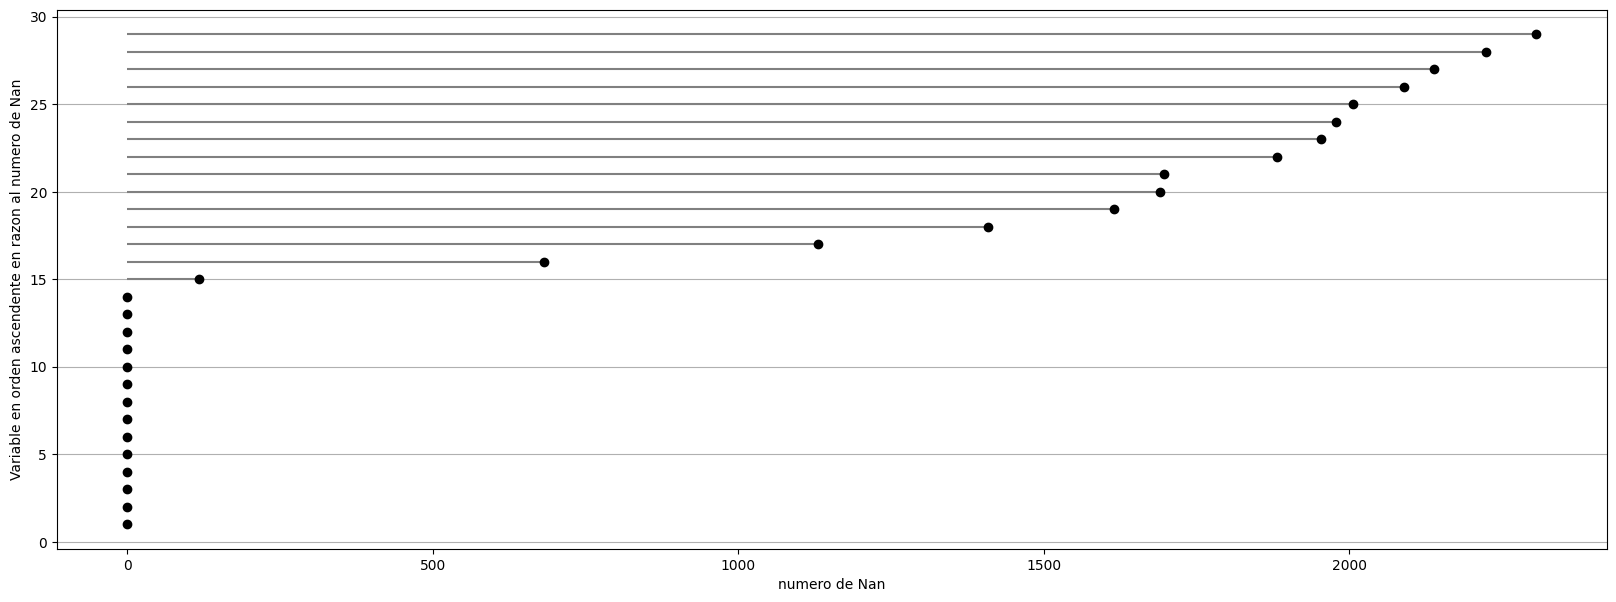

In [5]:
graf_num_nan(dfp)


Para todas las columnas excepto 
estrato y antiguedad se reemplazaran por 0

In [6]:
exclude_cols = ['antiguedad', 'estrato']

# reemplazar los valores NaN en las columnas no seleccionadas
cols_to_replace = dfp.columns[~dfp.columns.isin(exclude_cols)]
dfp[cols_to_replace] = dfp[cols_to_replace].fillna(0)

,variable,numero_Nan,observaciones,pct_missing
0,tipo,0,3480,0.000000
1,url,0,3480,0.000000
2,titulo,0,3480,0.000000
3,precio,0,3480,0.000000
4,area,0,3480,0.000000
5,habitaciones,0,3480,0.000000
6,banos,0,3480,0.000000
7,garajes,0,3480,0.000000
8,descripcion,0,3480,0.000000
9,Balcón,0,3480,0.000000


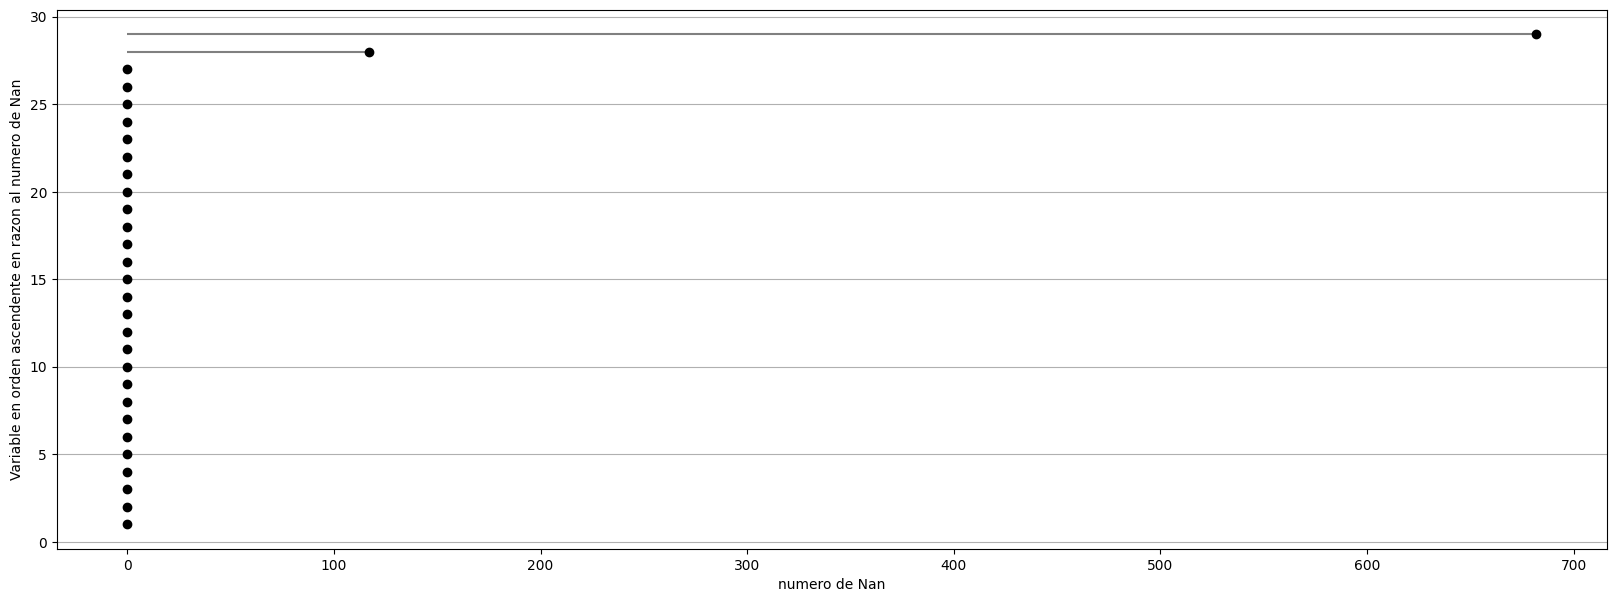

In [7]:
graf_num_nan(dfp)

# renombre de columnas

In [8]:
dfp.columns=dfp.columns.map(str.lower)

In [9]:
dfp.columns = [unidecode(i) for i in dfp.columns]

In [10]:
dfp.columns

Index(['tipo', 'url', 'titulo', 'precio', 'area', 'habitaciones', 'banos',
       'garajes', 'descripcion', 'balcon', 'trans. publico cercano', 'estrato',
       'antiguedad', 'cocina integral', 'bano auxiliar', 'zona de lavanderia',
       'zonas verdes', 'supermercados / c.comerciales', 'instalacion de gas',
       'parqueadero visitantes', 'colegios / universidades',
       'parques cercanos', 'zona residencial', 'closet', 'nombre municipio',
       'codigo departamento', 'codigo municipio', 'nombre departamento',
       'tipo: municipio / isla / area no municipalizada'],
      dtype='object')

In [11]:
dfp.head()

,tipo,url,titulo,precio,area,habitaciones,banos,garajes,descripcion,balcon,...,parqueadero visitantes,colegios / universidades,parques cercanos,zona residencial,closet,nombre municipio,codigo departamento,codigo municipio,nombre departamento,tipo: municipio / isla / area no municipalizada
0,Usada,https://www.fincaraiz.com.co/casa-campestre-en...,Casa Campestre en Venta Rionegro Vereda Guayabito,$ 1.380.000.000,"320,00 m²",5,6,2,Propiedad moderna con muy buenos acabados. Her...,1.0,...,0.0,0.0,0.0,0.0,0.0,RIONEGRO,5,5615.0,ANTIOQUIA,Municipio
1,Usada,https://www.fincaraiz.com.co/casa-campestre-en...,Casa Campestre en Venta Rionegro Vereda Guayabito,$ 1.380.000.000,"320,00 m²",5,6,2,Propiedad moderna con muy buenos acabados. Her...,1.0,...,0.0,0.0,0.0,0.0,0.0,RIONEGRO,68,68615.0,SANTANDER,Municipio
2,Nueva,https://www.fincaraiz.com.co/vivari-de-san-nic...,VIVARI DE SAN NICOLAS San Nicolás - Rionegro,$ 496.122.600,"91,97 m2",3,3,1,"6234794 Vivari San Nicolás, es un conjunto res...",1.0,...,0.0,0.0,0.0,0.0,0.0,RIONEGRO,5,5615.0,ANTIOQUIA,Municipio
3,Nueva,https://www.fincaraiz.com.co/vivari-de-san-nic...,VIVARI DE SAN NICOLAS San Nicolás - Rionegro,$ 496.122.600,"91,97 m2",3,3,1,"6234794 Vivari San Nicolás, es un conjunto res...",1.0,...,0.0,0.0,0.0,0.0,0.0,RIONEGRO,68,68615.0,SANTANDER,Municipio
4,Nueva,https://www.fincaraiz.com.co/altos-de-santana/...,ALTOS DE SANTANA Oriente Antioqueño - Rionegro,$ 360.002.000,"73,37 m2",3,3,Sin especificar,6351568 Proyecto de apartamentos de 2 y 3 habi...,0.0,...,0.0,1.0,0.0,0.0,0.0,RIONEGRO,5,5615.0,ANTIOQUIA,Municipio


In [12]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 29 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   tipo                                             3480 non-null   object 
 1   url                                              3480 non-null   object 
 2   titulo                                           3480 non-null   object 
 3   precio                                           3480 non-null   object 
 4   area                                             3480 non-null   object 
 5   habitaciones                                     3480 non-null   object 
 6   banos                                            3480 non-null   object 
 7   garajes                                          3480 non-null   object 
 8   descripcion                                      3480 non-null   object 
 9   balcon                        

# se procede a relizar reorganizacion de varibales


Se cambiaran los tipos de variables y detalles

a la variable precio se le quitara el simbolo y se pasara a numero

In [17]:
dfp['precio']

0       $ 1.380.000.000
1       $ 1.380.000.000
2         $ 496.122.600
3         $ 496.122.600
4         $ 360.002.000
             ...       
3475      $ 195.000.000
3476    $ 1.800.000.000
3477    $ 3.100.000.000
3478    $ 1.800.000.000
3479      $ 120.000.000
Name: precio, Length: 3480, dtype: object

In [27]:
dfp['precio'][0]

'$ 1.380.000.000'

In [33]:
dfp['precio'] = dfp['precio'].apply(lambda x: int(x.replace('$', '').replace(' ', '').replace('.', '')))
dfp['precio']

0       1380000000
1       1380000000
2        496122600
3        496122600
4        360002000
           ...    
3475     195000000
3476    1800000000
3477    3100000000
3478    1800000000
3479     120000000
Name: precio, Length: 3480, dtype: int64